In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import src.bayesian_stats as bst

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.2.2


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95
az.rcParams["plot.density_kind"] = "hist"
rng = np.random.default_rng(seed=42)


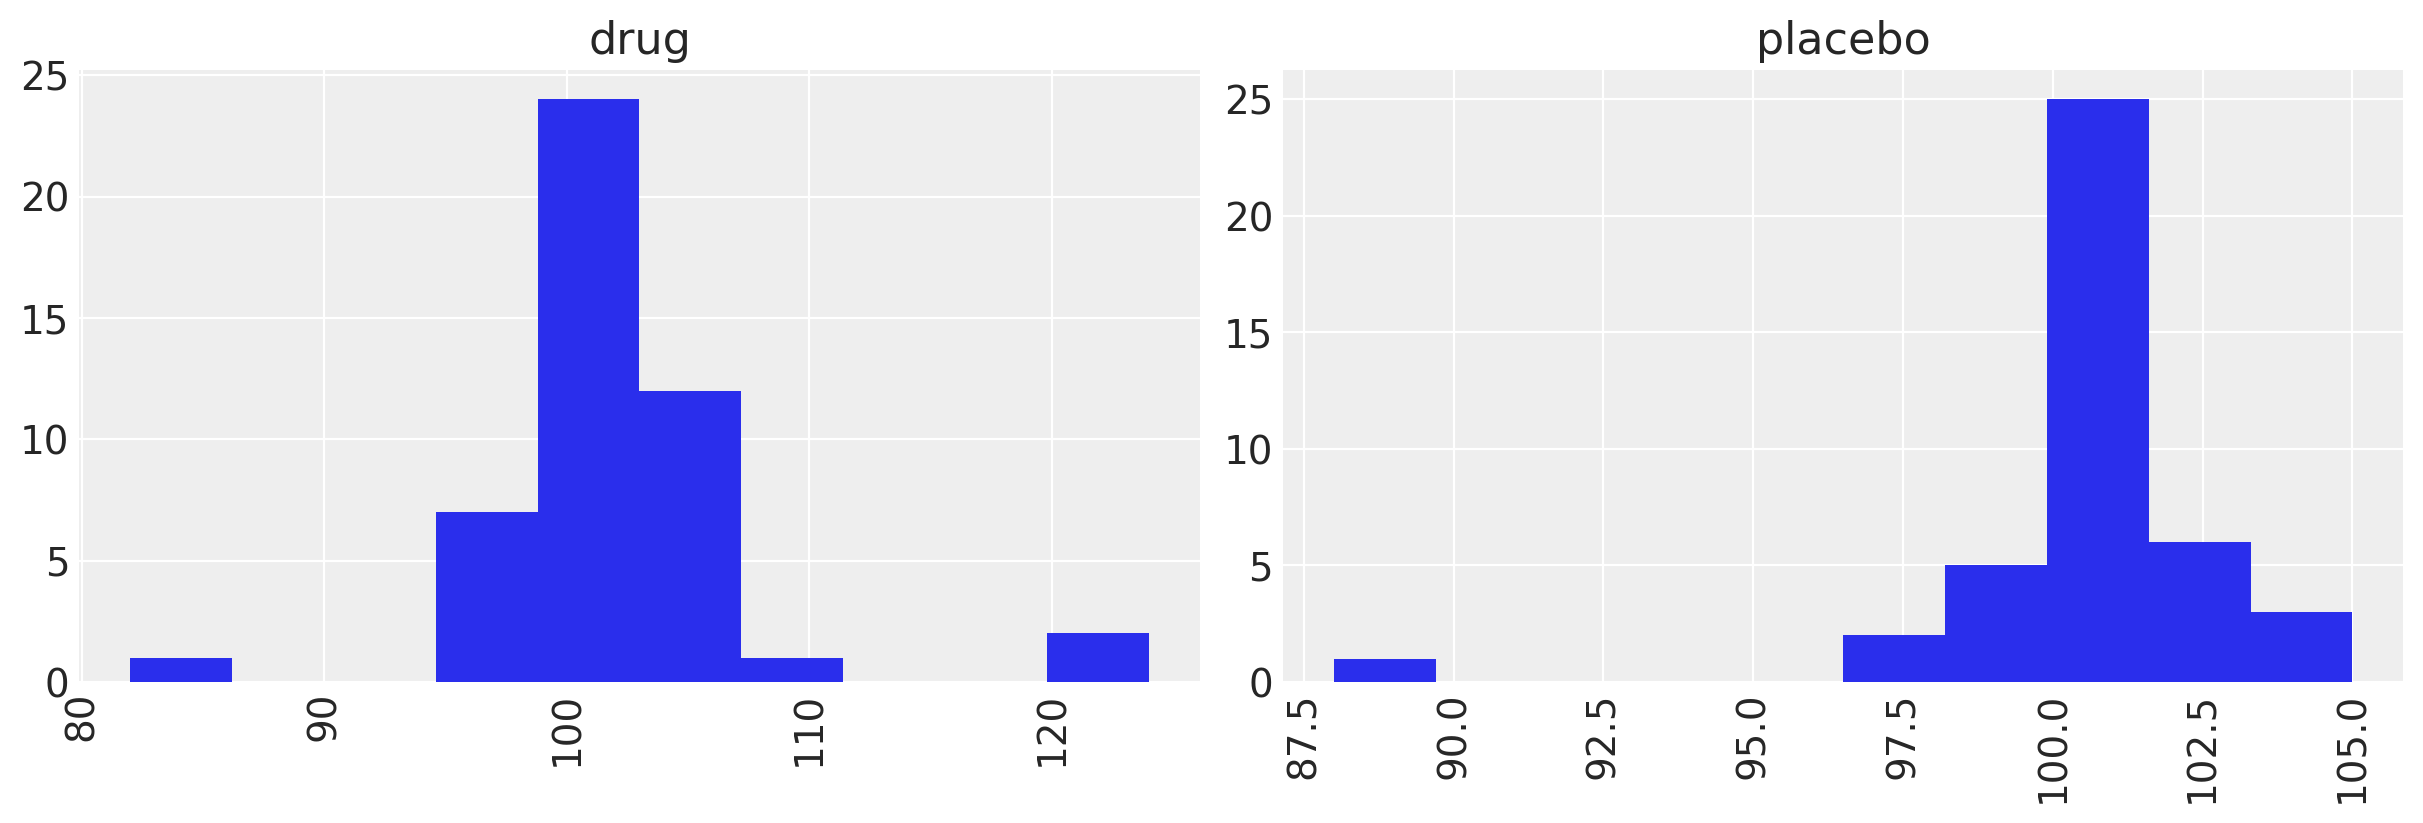

In [3]:
# Using data from pymc3 port of Kruschke's BEST model (see: 
# https://www.pymc.io/projects/examples/en/latest/case_studies/BEST.html)
drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

y.hist("value", by="group", figsize=(12, 4));

In [4]:
# Call your Bayesian function from the toolbox
# model, idata = bst.BEST(y["value"], y["group"], 2000)
model, idata = bst.BEST_copy(y["value"], y["group"], 2000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group_mean, group_std, nu_minus_one]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
The acceptance probability does not match the target. It is 0.52, but should be close to 0.8. Try to increase the number of tuning steps.


In [5]:
# Print out a summary of results
az.summary(idata)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
group_mean[0],101.549,0.380,100.784,102.298,0.005,0.004,5417.0,4361.0,1.0
group_mean[1],100.527,0.218,100.118,100.986,0.003,0.002,5208.0,4905.0,1.0
group_std[0],2.060,0.429,1.263,2.907,0.006,0.004,5554.0,4983.0,1.0
group_std[1],1.056,0.209,0.678,1.480,0.003,0.002,5178.0,3660.0,1.0
nu_minus_one,0.840,0.472,0.029,1.728,0.006,0.005,4771.0,3893.0,1.0
nu,1.840,0.472,1.029,2.728,0.006,0.005,4771.0,3893.0,1.0
nu_log10,0.252,0.106,0.050,0.459,0.001,0.001,4771.0,3893.0,1.0
difference of means,1.022,0.439,0.169,1.903,0.006,0.004,5671.0,4277.0,1.0
difference of stds,1.004,0.443,0.149,1.884,0.005,0.004,6886.0,5730.0,1.0
effect size,0.643,0.299,0.017,1.201,0.004,0.003,5855.0,4324.0,1.0


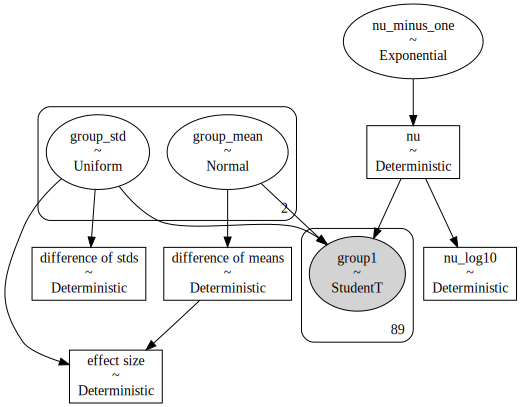

In [6]:
pm.model_to_graphviz(model)

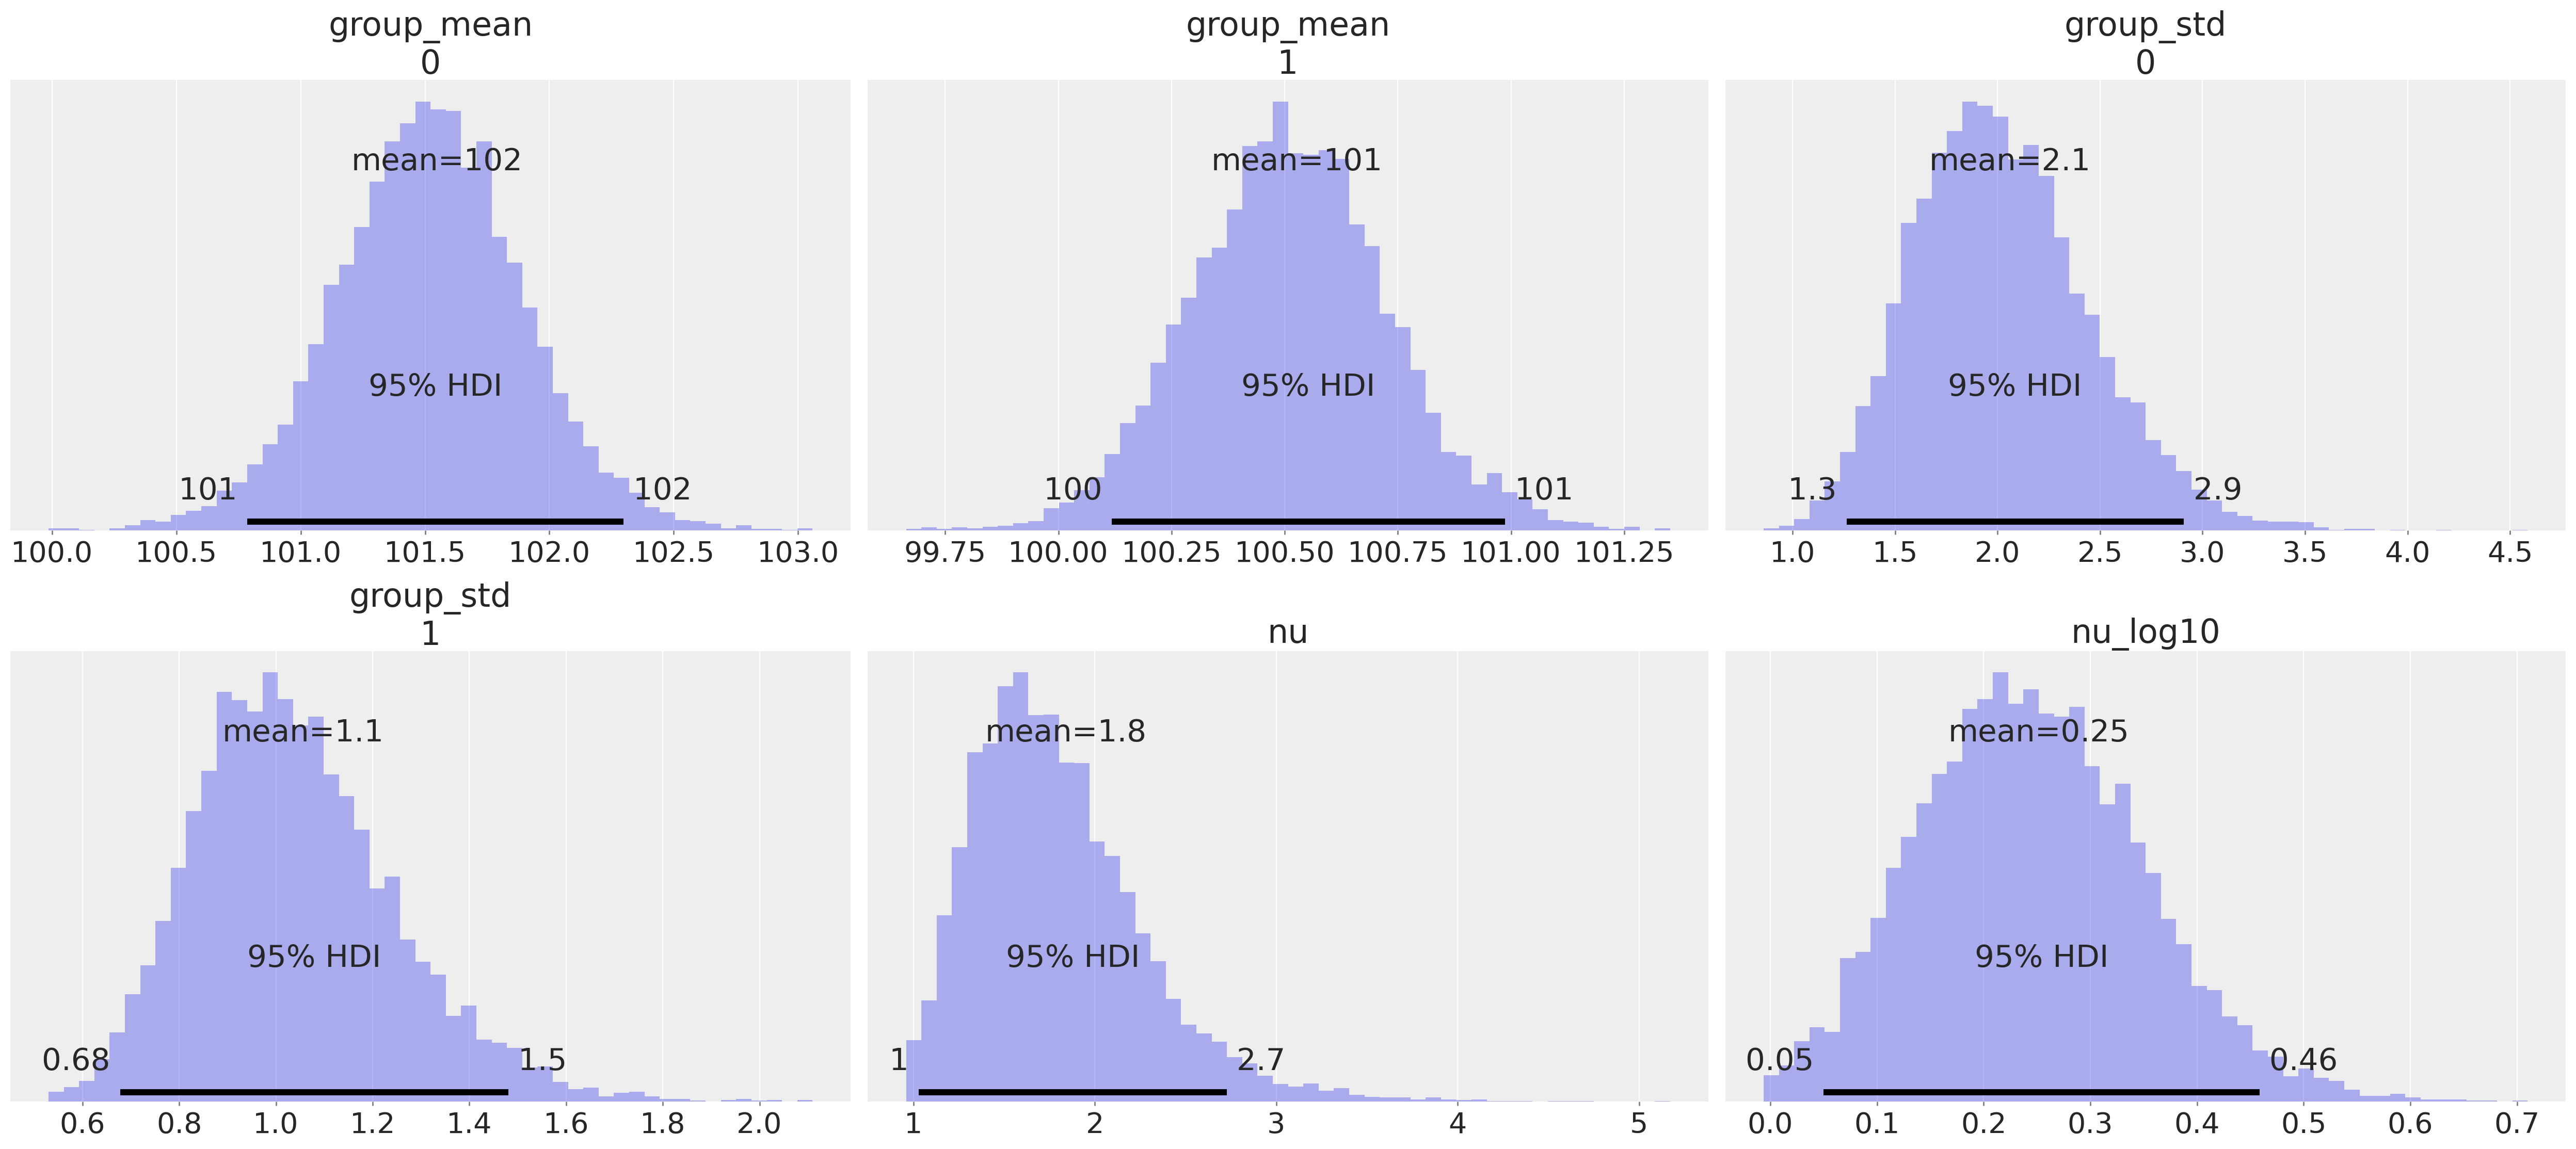

In [7]:
# Plot posterior
# az.plot_posterior(
#     idata,
#     var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "nu", "nu_log10"],
#     bins=50,
#     textsize=20
# );
az.plot_posterior(
    idata,
    var_names=["group_mean", "group_std",  "nu", "nu_log10"],
    bins=50,
    textsize=20
);

In [ ]:
# idata_posterior = idata.posterior


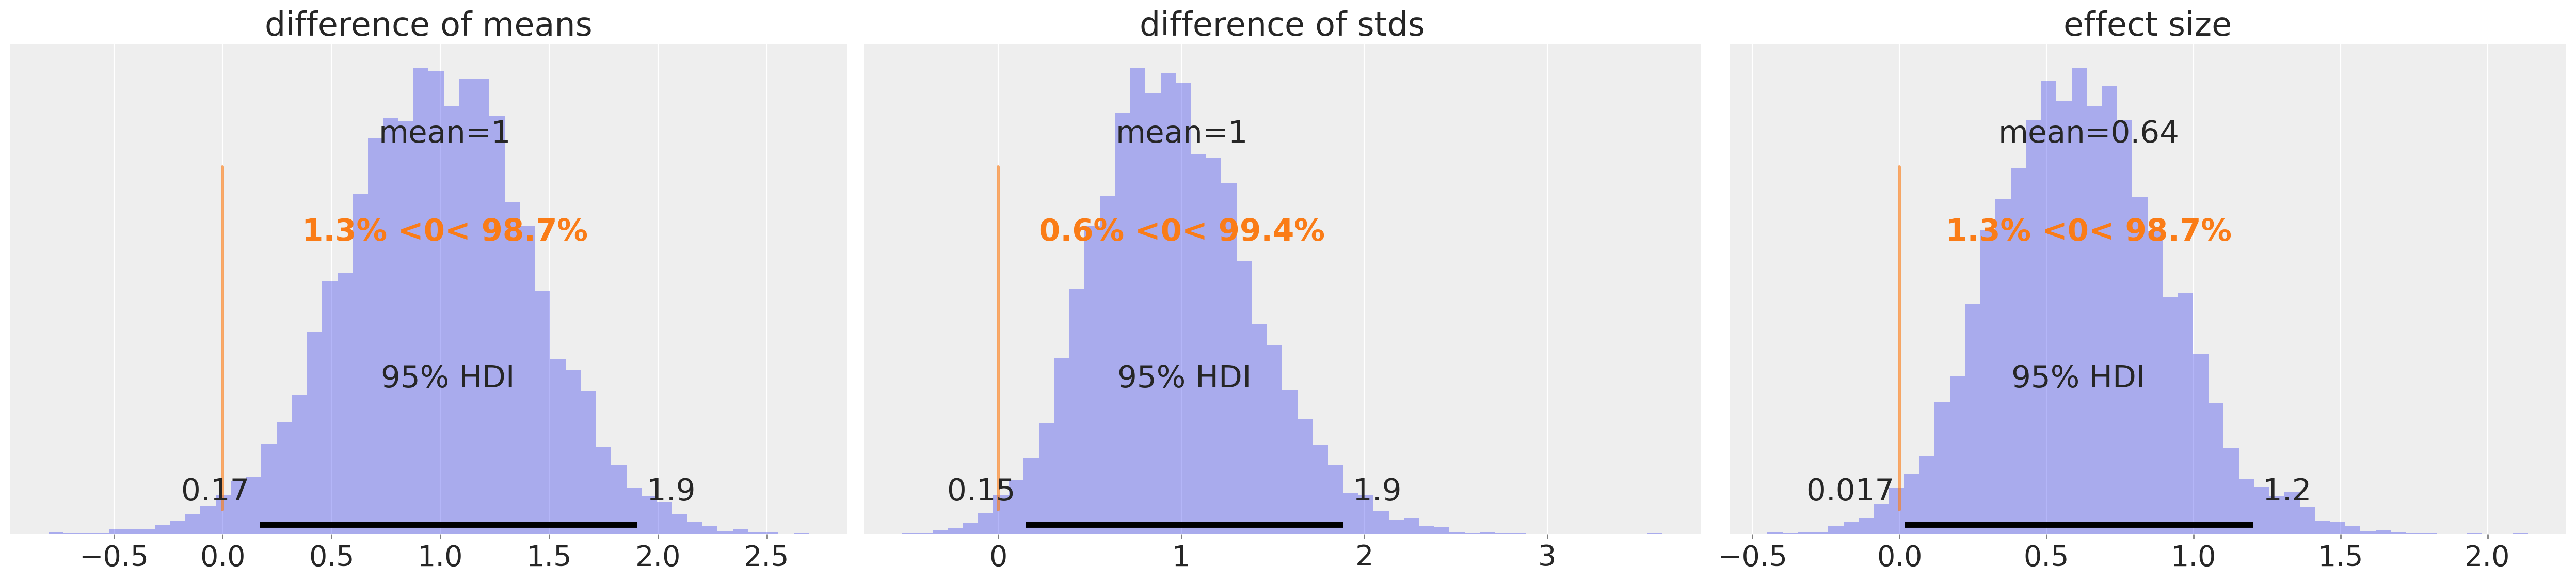

In [8]:
# Plot posterior
az.plot_posterior(
    idata,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    bins=50,
    textsize=20
);

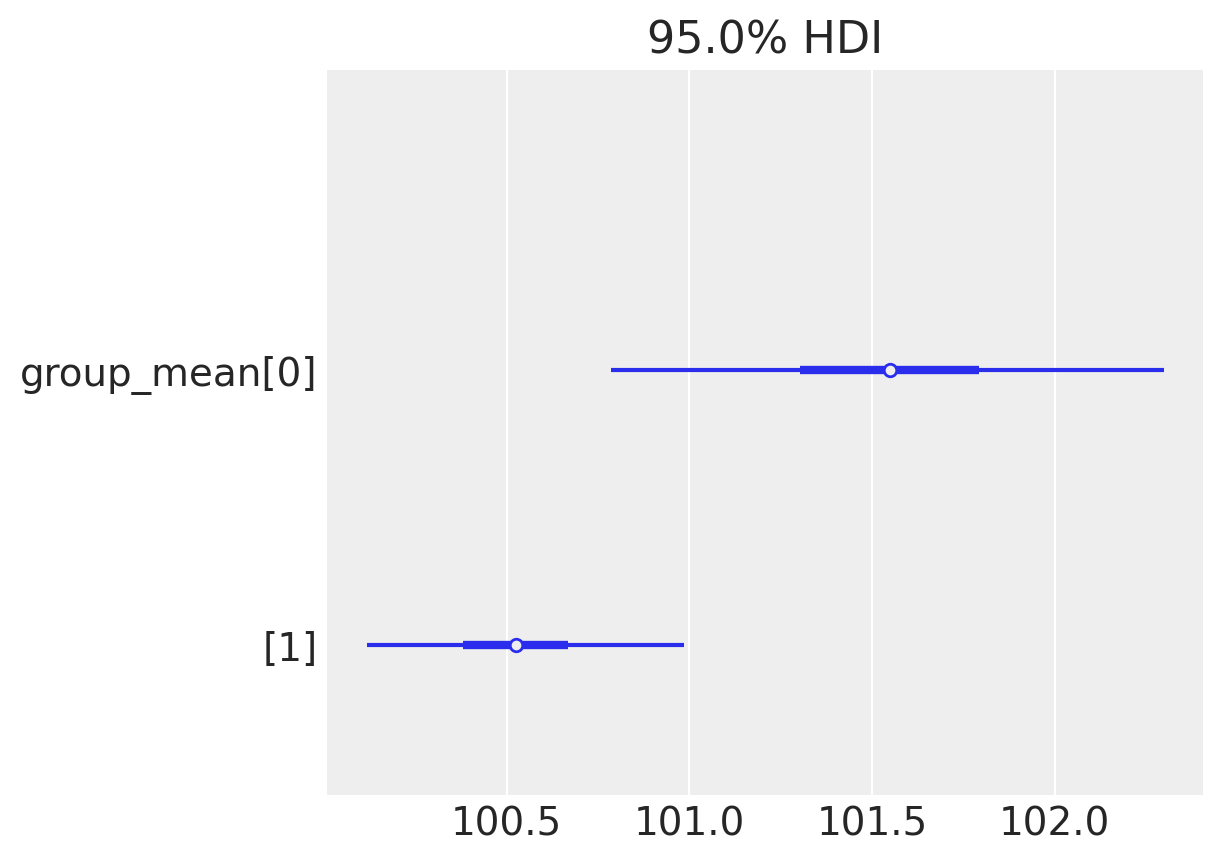

In [10]:
# Plot parameter estimates
#az.plot_forest(idata, var_names=["group1_mean", "group2_mean"], combined=True);
az.plot_forest(idata, var_names=["group_mean"], combined=True);

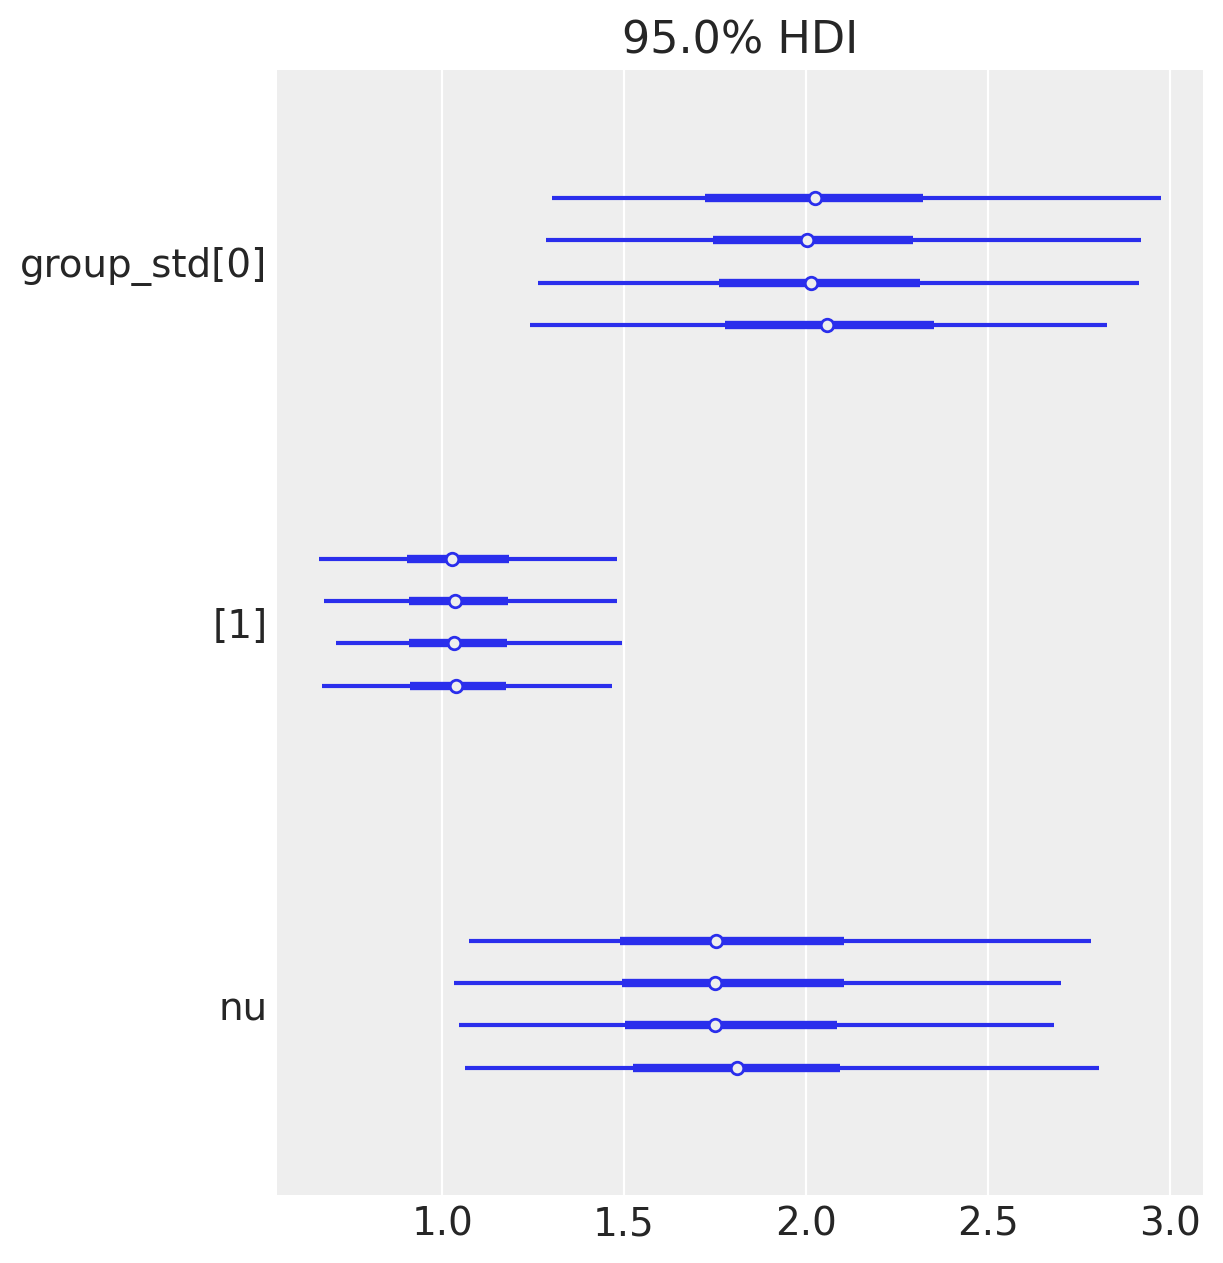

In [11]:
# Plot parameter estimates
#az.plot_forest(idata, var_names=["group1_std", "group2_std", "nu"]);
az.plot_forest(idata, var_names=["group_std", "nu"]);

In [ ]:
# If you want to print the model so that you edit, simply add two question marks after the function name.
bst.BEST_copy??

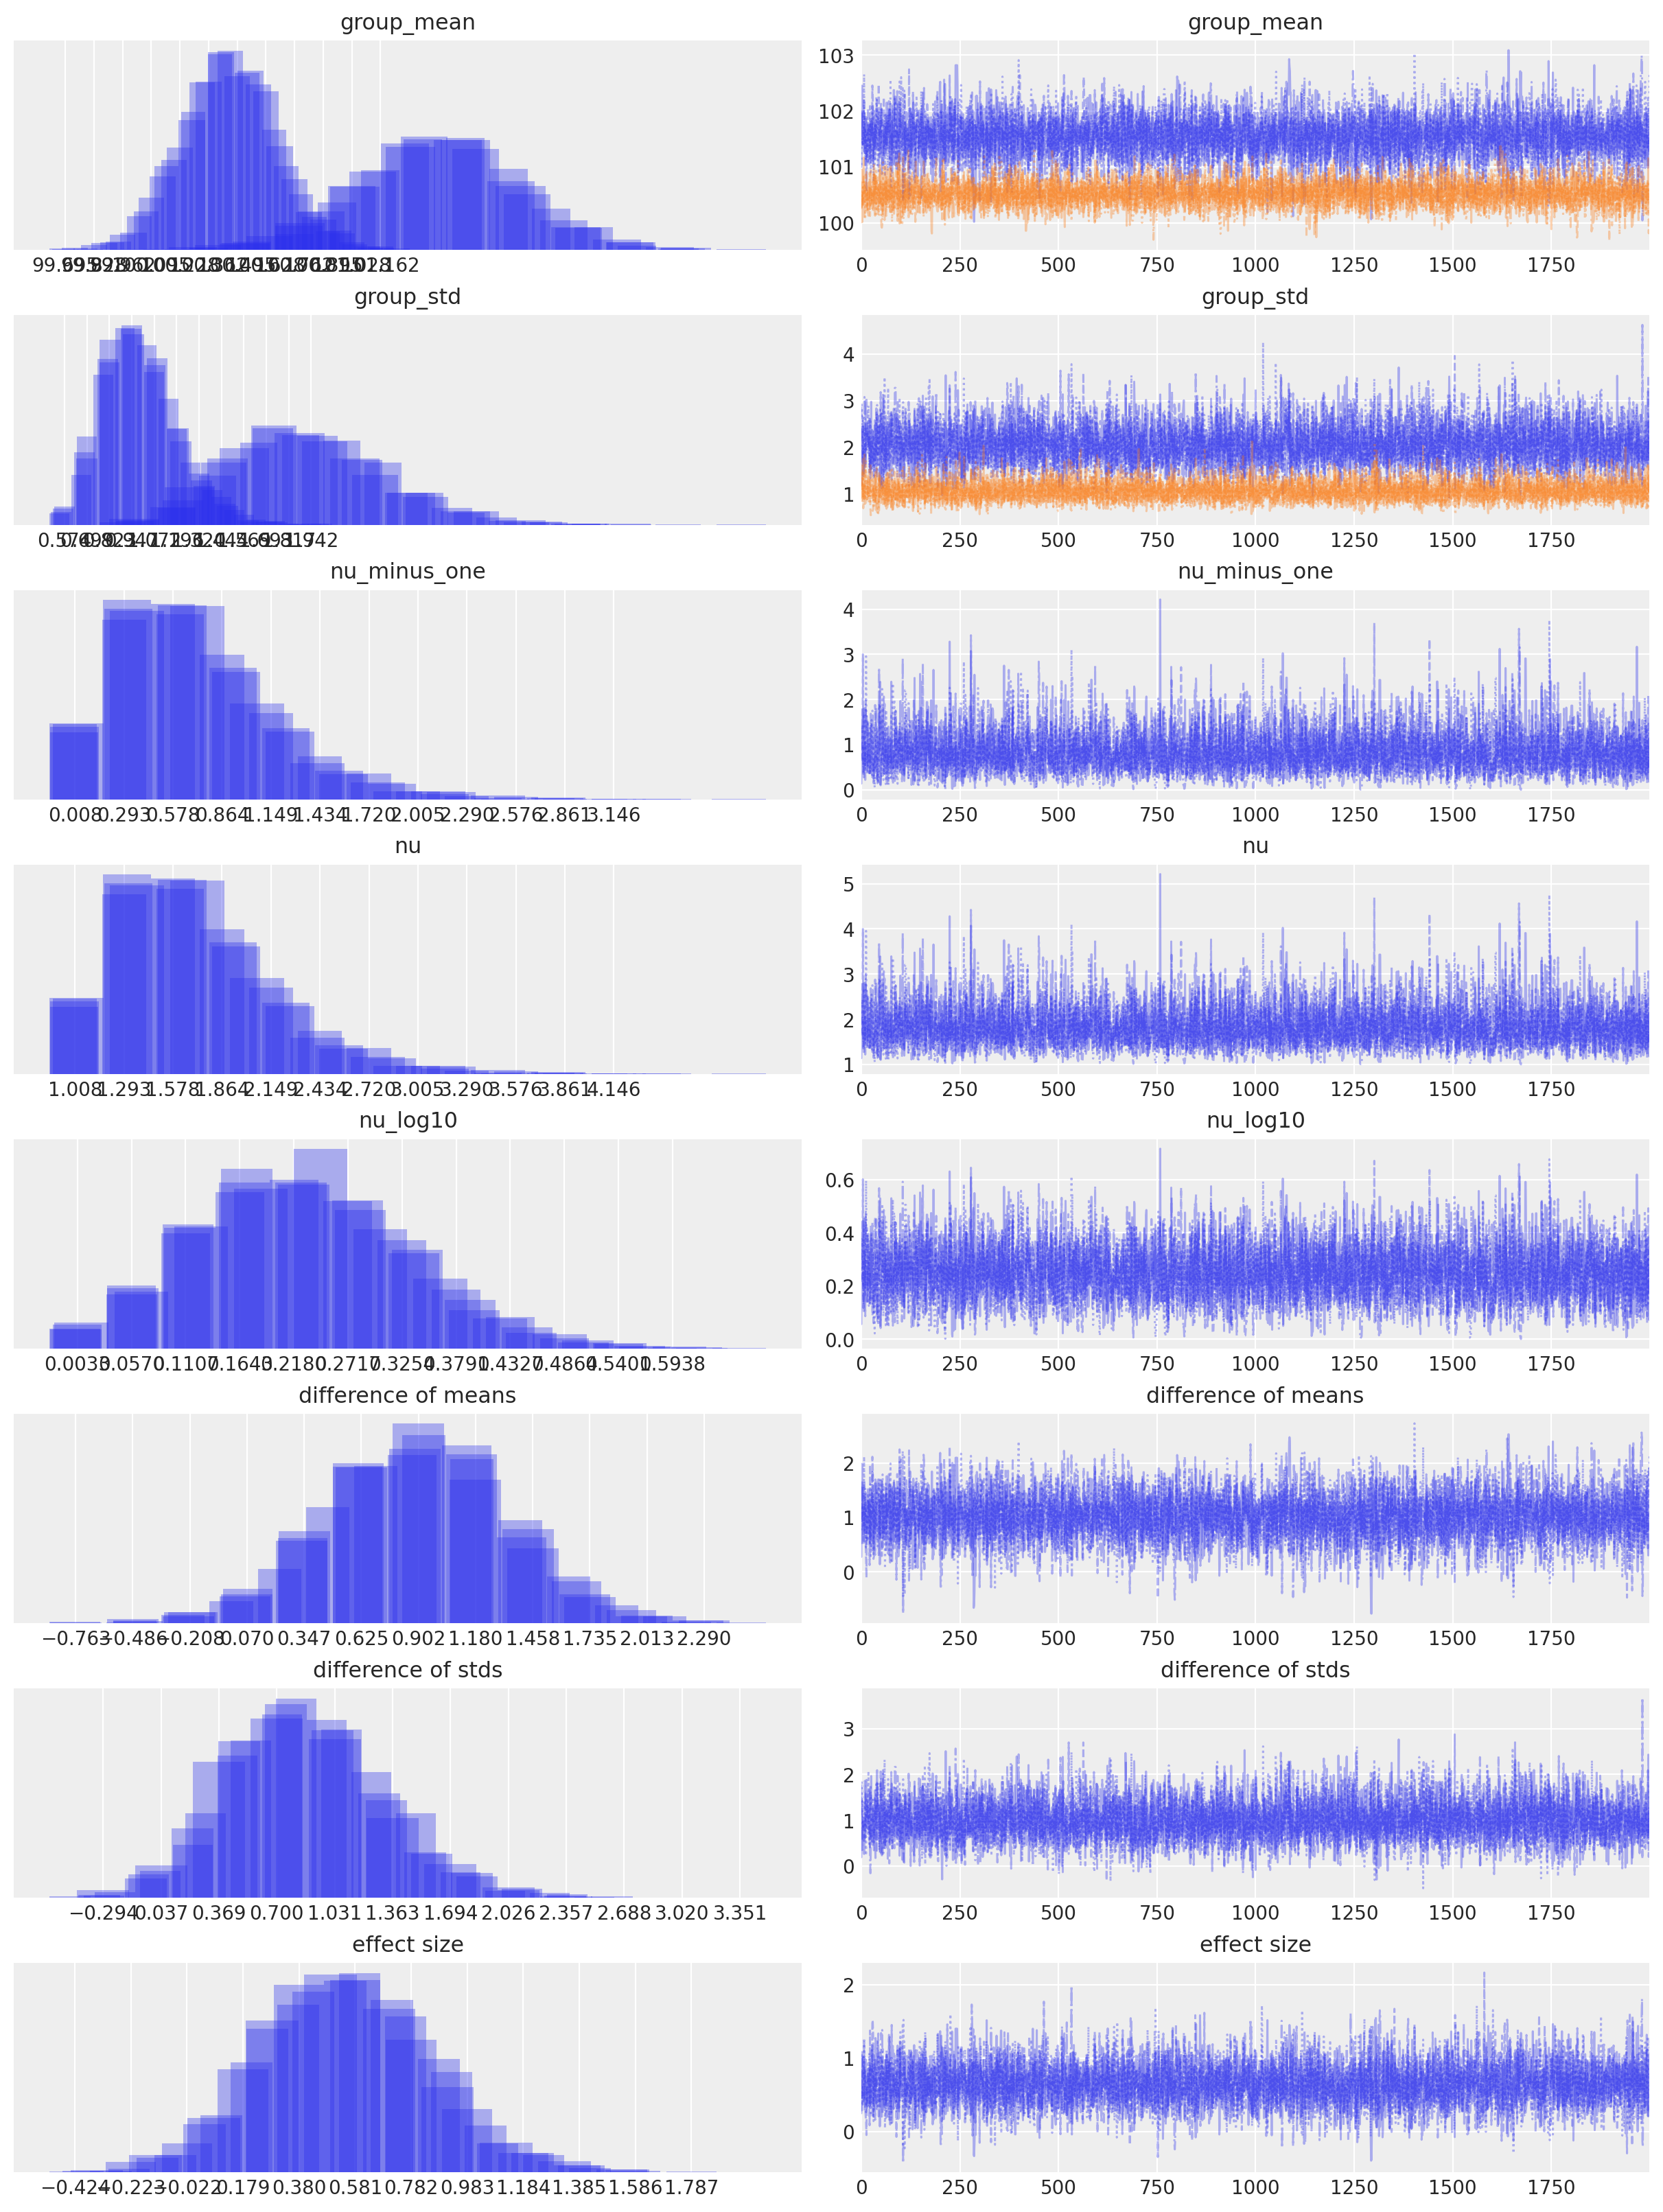

In [12]:
# Assess your MCMC chains.
az.plot_trace(idata);

In [13]:
# Posterior predictive check
with model:
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

Sampling: [group1]


In [ ]:
az.plot_ppc(idata, var_names=["group1", "group2"], num_pp_samples=50);

In [ ]:
az.rcParams.keys()

In [ ]:
plt.rcParams